# Predicting House Prices:

#### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('Housing.csv')

### Data Inspection

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


### Data cleaning and preprocessing

In [7]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [8]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


<Axes: xlabel='price', ylabel='area'>

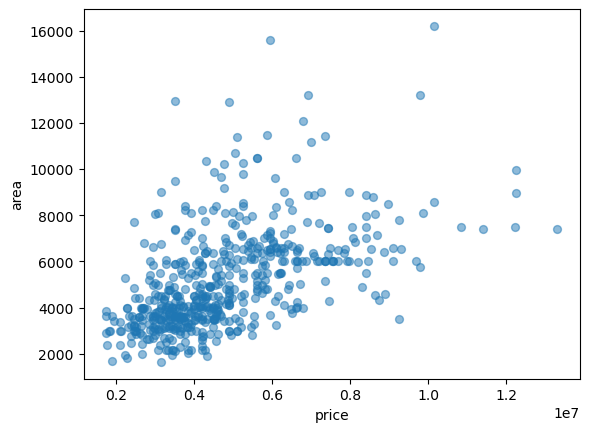

In [11]:
df.plot(kind='scatter',x='price',y='area',s=32,alpha=0.5)

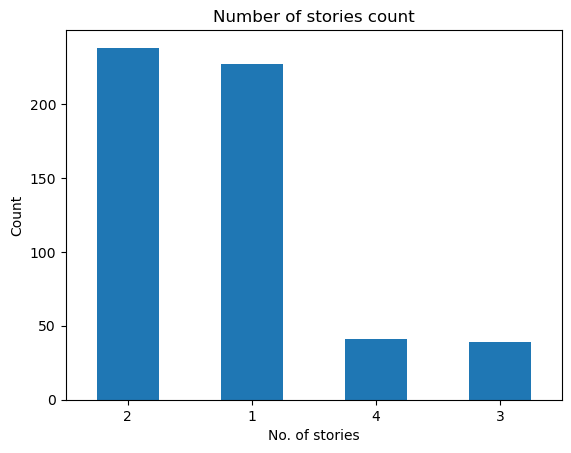

In [12]:
stories_count= df['stories'].value_counts()
stories_count.plot(kind='bar')
plt.title('Number of stories count')
plt.xlabel('No. of stories')
plt.ylabel('Count')

plt.xticks(rotation=0)
plt.show()
        

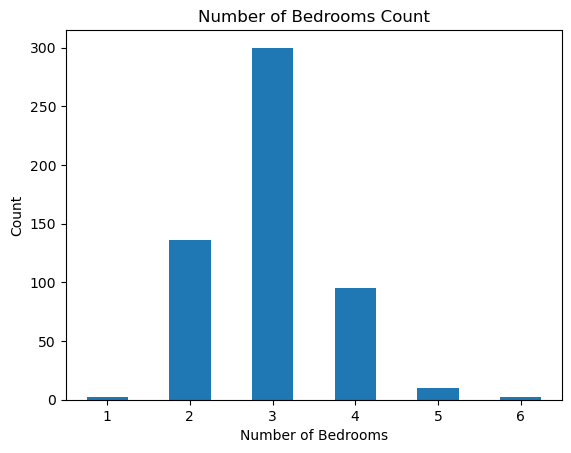

In [13]:
bedrooms_count = df['bedrooms'].value_counts()
bedrooms_count_sorted = bedrooms_count.sort_index()
bedrooms_count_sorted.plot(kind='bar')
plt.title('Number of Bedrooms Count')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

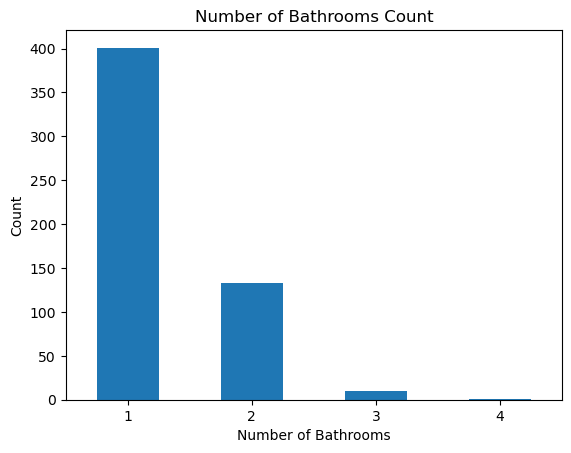

In [14]:
bathrooms_count = df[ 'bathrooms'].value_counts()
bathrooms_count_sorted =  bathrooms_count.sort_index()
bathrooms_count_sorted.plot(kind='bar')
plt.title('Number of Bathrooms Count')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

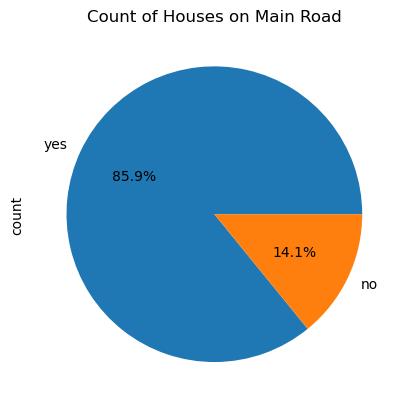

In [15]:
mainroad_count = df['mainroad'].value_counts()
mainroad_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Count of Houses on Main Road') 
plt.show()

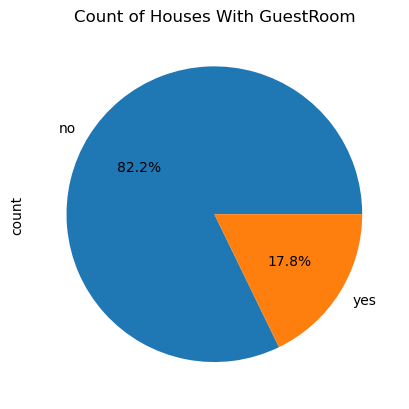

In [16]:
guestroom_count = df['guestroom'].value_counts()
guestroom_count.plot(kind='pie', autopct='%1.1f%%')
plt.title('Count of Houses With GuestRoom')
plt.show()

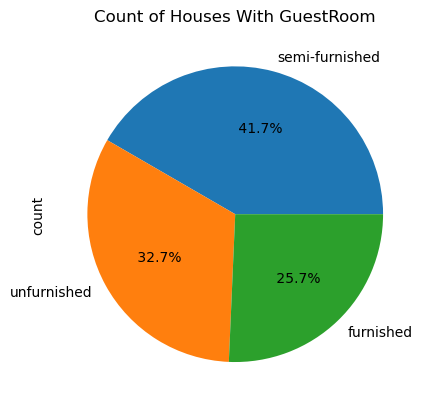

In [17]:
furnishing_status = df['furnishingstatus'].value_counts( )
furnishing_status. plot(kind='pie', autopct =  '% 1.1f%%')
plt.title('Count of Houses With GuestRoom')
plt.show()

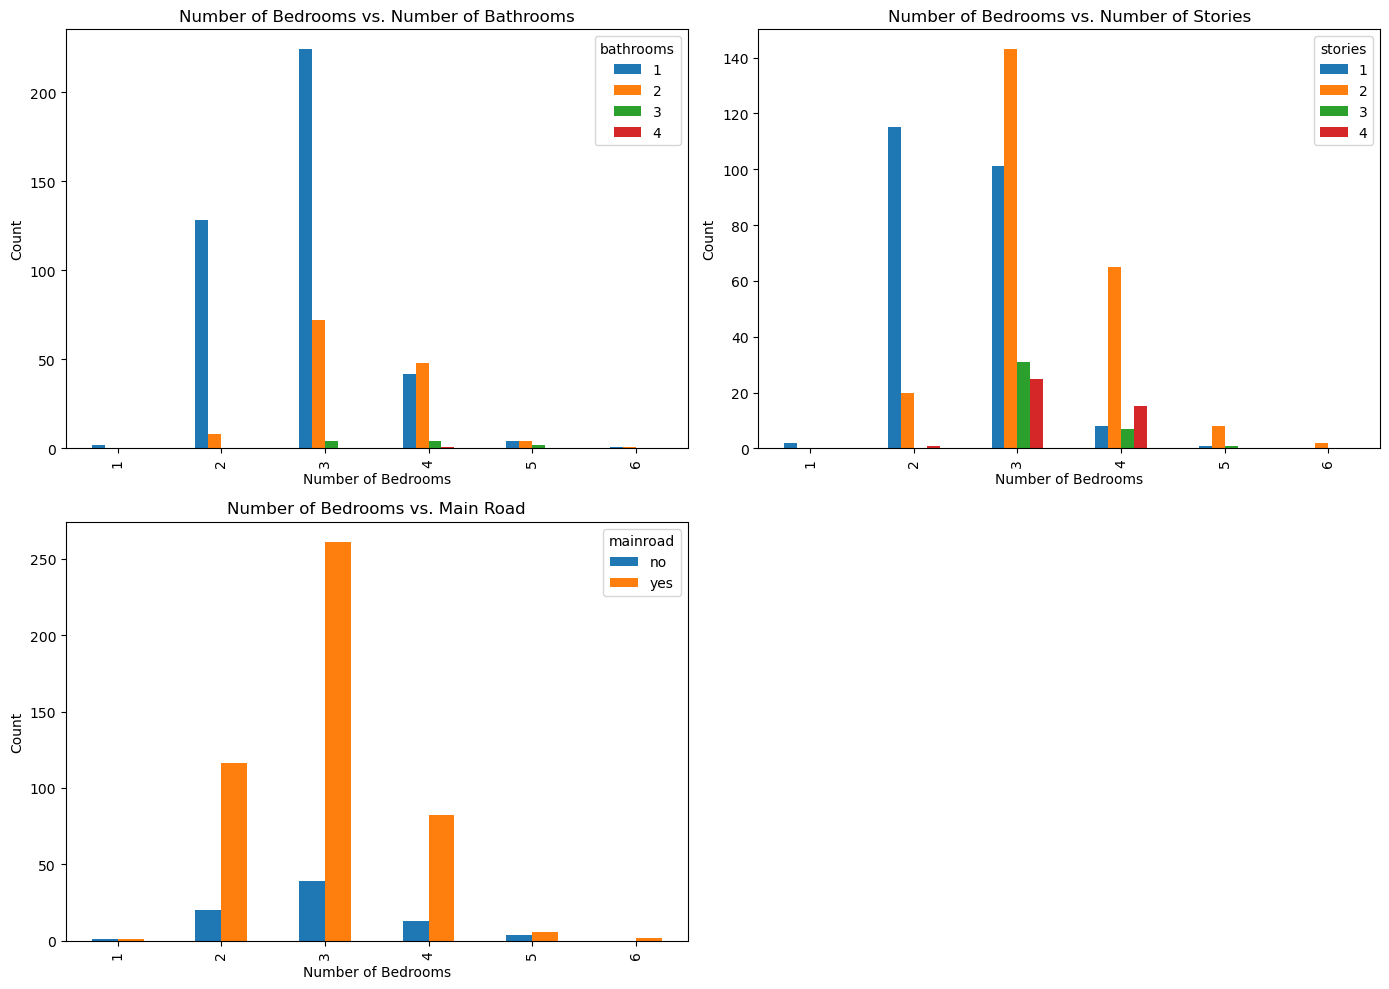

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
bedrooms_bathrooms =  pd.crosstab(df[ 'bedrooms'], df['bathrooms'])
bedrooms_bathrooms.plot(kind='bar', ax=axes [0, 0])
axes[0, 0].set_title('Number of Bedrooms vs. Number of Bathrooms')
axes[0, 0].set_xlabel('Number of Bedrooms')
axes[0, 0].set_ylabel('Count')

bedrooms_stories = pd.crosstab(df['bedrooms'], df['stories'])
bedrooms_stories.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Number of Bedrooms vs. Number of Stories')
axes[0, 1].set_xlabel('Number of Bedrooms')
axes[0, 1].set_ylabel('Count')

bedrooms_mainroad = pd.crosstab(df[ 'bedrooms'], df['mainroad'])
bedrooms_mainroad.plot(kind='bar', ax=axes [1, 0])
axes[1, 0].set_title('Number of Bedrooms vs. Main Road')
axes[1, 0].set_xlabel('Number of Bedrooms')
axes[1, 0].set_ylabel('Count')
axes[1, 1].axis('off')
plt.tight_layout()
plt.show()

## Feature engineering

In [19]:
encoder = LabelEncoder()

In [20]:
encoding_col = ['furnishingstatus', 'prefarea' ,'airconditioning',  'hotwaterheating', 'basement', 'guestroom', 'mainroad']
for col in encoding_col:
    df[col] = encoder.fit_transform(df[col])

In [21]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


## Model selection and training (e.g., linear regression)

In [22]:
x=df.drop(columns=['price'], axis = 1)
y=df['price']

In [23]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [25]:
ln_model = LinearRegression()
ln_model.fit(x_train, y_train)

LinearRegression()

In [26]:
y_pred = ln_model.predict(x_test)

In [27]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [28]:
 mse

0.01328124372927074

In [29]:
mae

0.08482075249315933

In [30]:
ln_acc = r2_score (y_test, y_pred)
ln_acc

0.6494754192267793

Building model using statsmodel, for the detailed statistics

## Model Evaluation

In [31]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [32]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
scaler = MinMaxScaler()

In [34]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [35]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,2
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,2


In [36]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,1.065617
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.763233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [37]:
y_train = df_train.pop('price')
X_train = df_train

In [38]:
X_train_rfe = X_train[col]

## Model Evaluation

In [39]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [40]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [41]:
y_test = df_test.pop('price')
X_test = df_test